In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DataSets/estrellas.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
data['target_class'].unique()

array([0, 1])

In [5]:
data['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

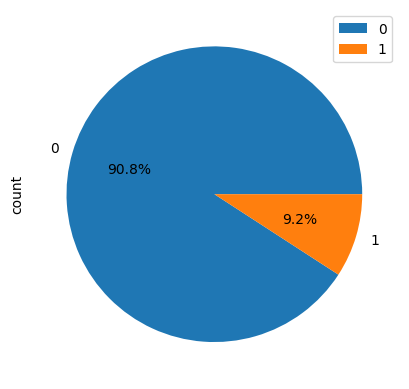

In [6]:
data['target_class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.show()

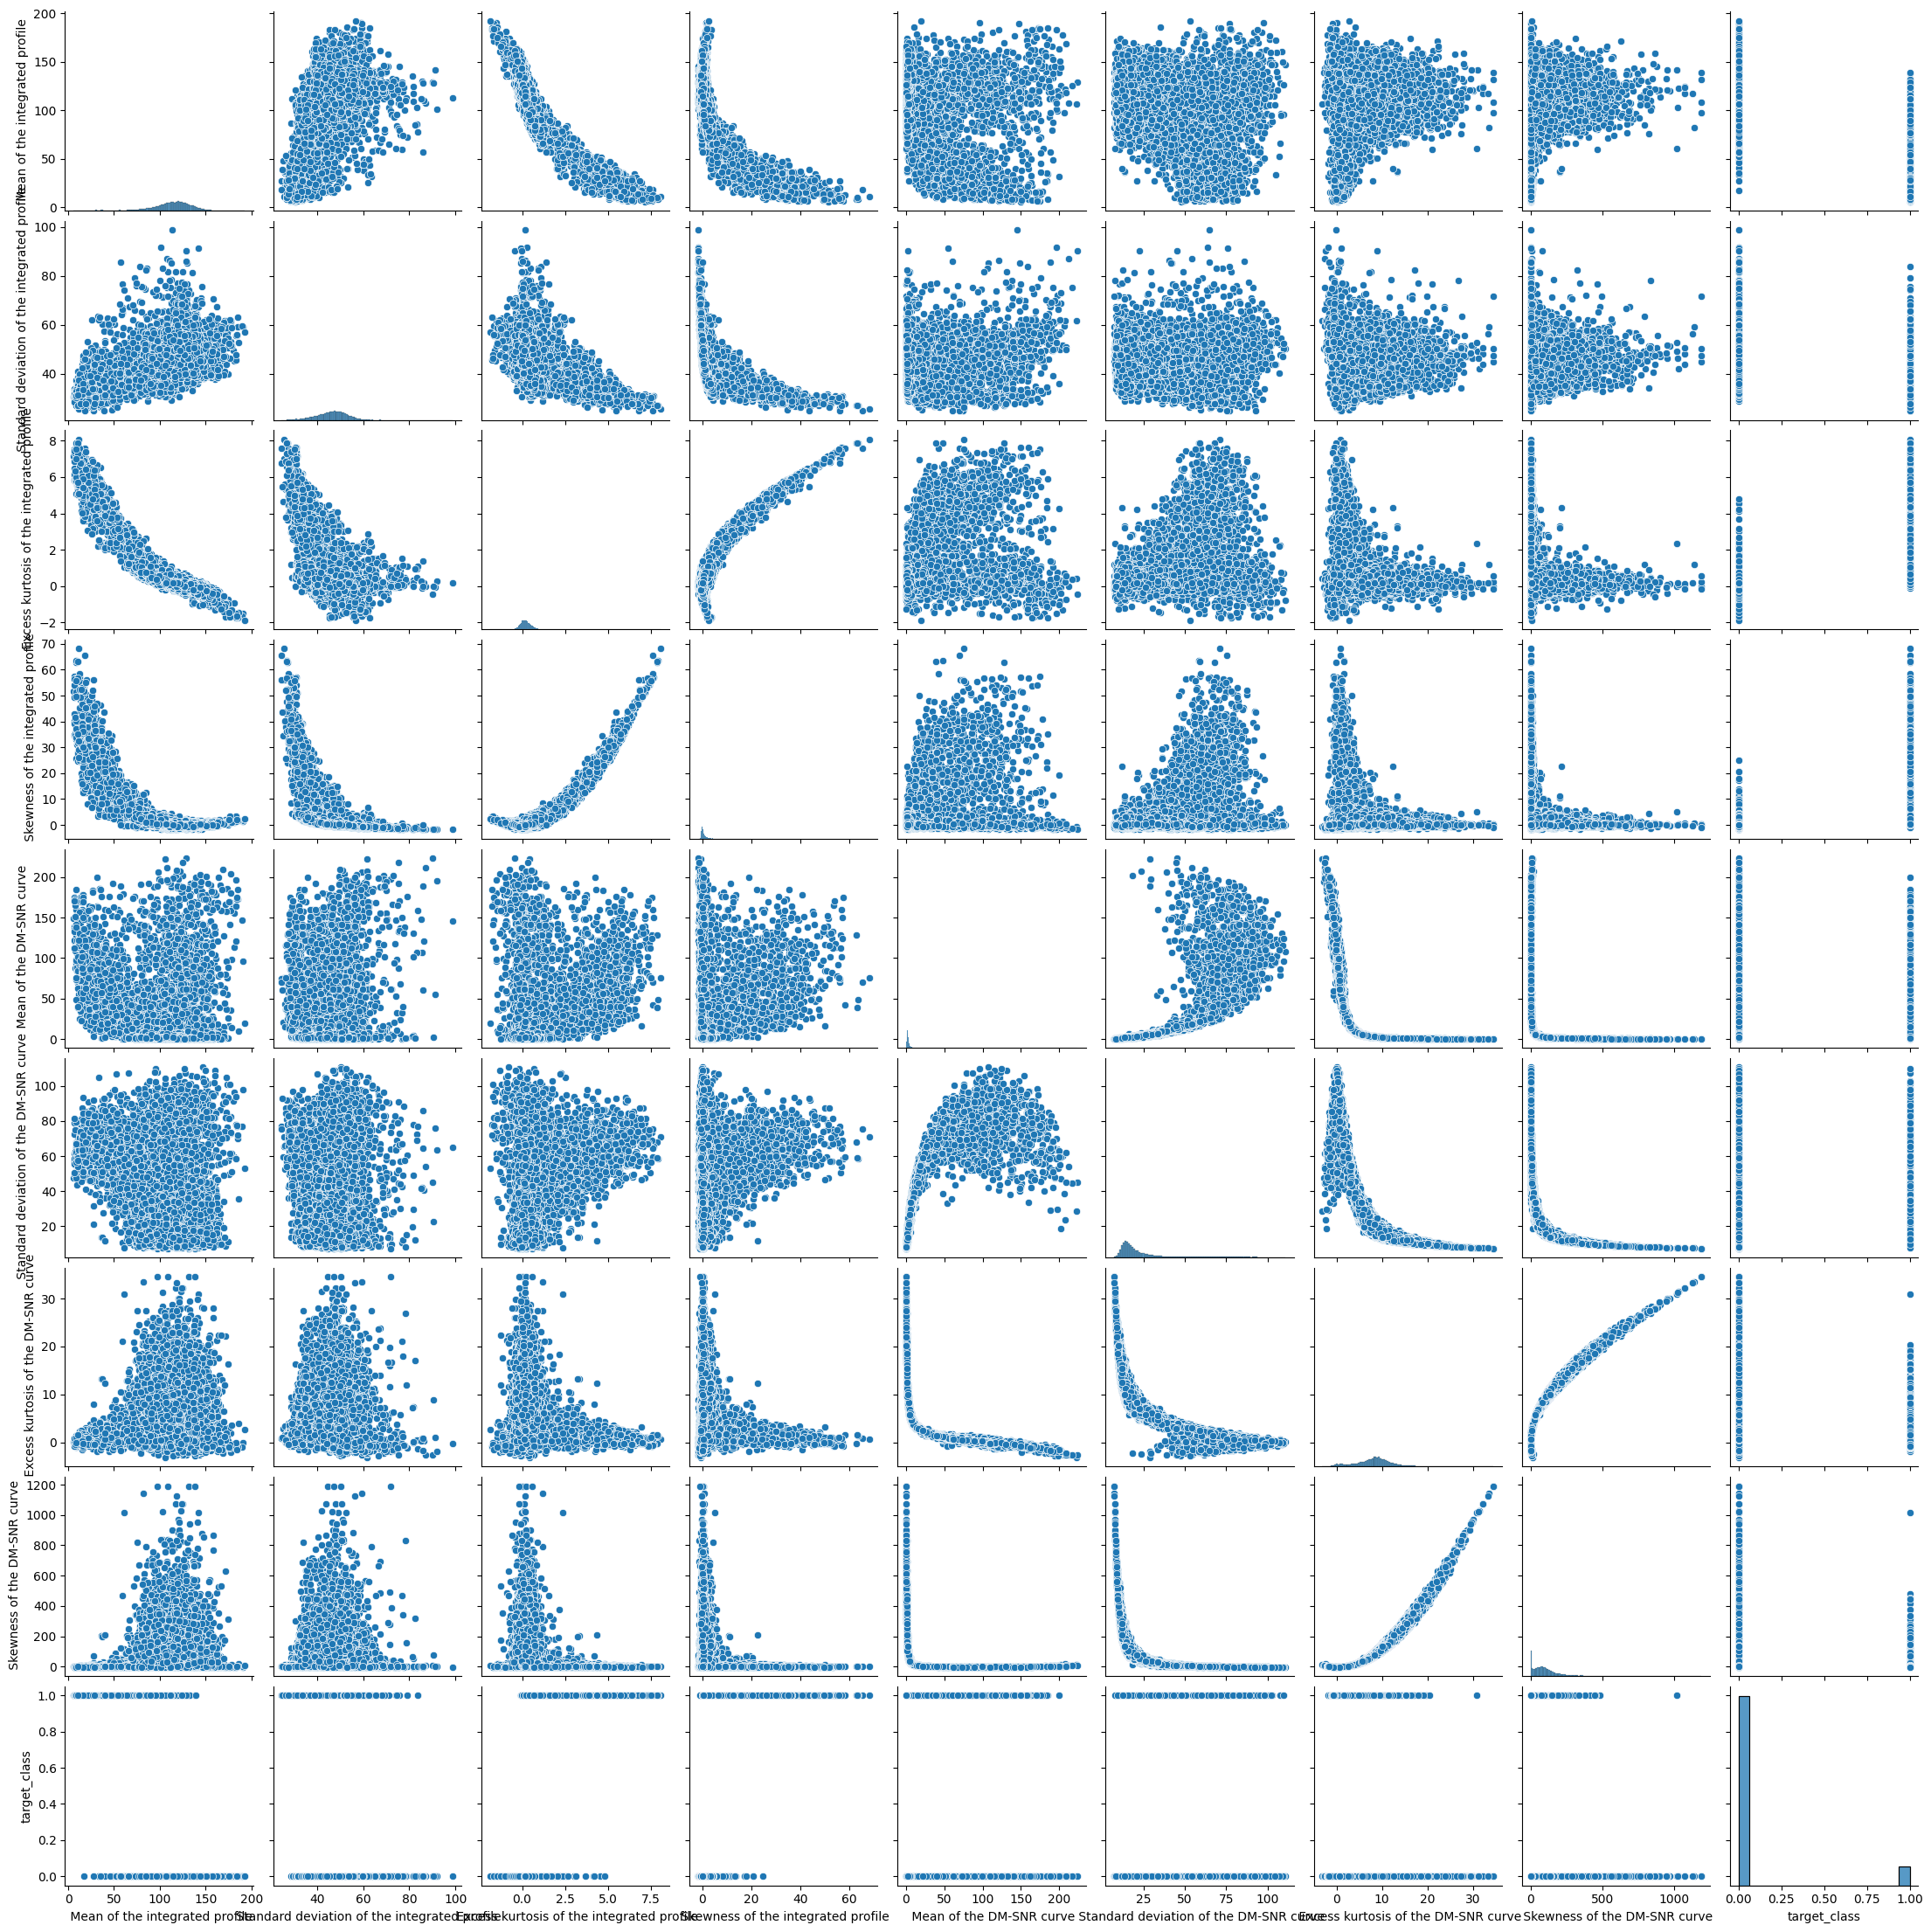

In [7]:
sns.pairplot(data)

In [8]:
_list = [x for x in data.columns if x != 'target_class']

In [9]:
x = np.array(data[_list])
y = np.array(data[['target_class']])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
rfe = RFE(log, n_features_to_select=5)
rfe = rfe.fit(x,y)

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
list2 = list(zip(_list,rfe.ranking_))
list2

[(' Mean of the integrated profile', np.int64(1)),
 (' Standard deviation of the integrated profile', np.int64(1)),
 (' Excess kurtosis of the integrated profile', np.int64(1)),
 (' Skewness of the integrated profile', np.int64(1))]

In [37]:
col = []

for i in range(len(list2)):
    if list2[i][1] == 1:
        col.append(list2[i][0])

x = np.array(data[col])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [39]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train.ravel())

LogisticRegression()

In [40]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log,x_train, y_train, scoring='accuracy', cv=10)
score

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning

array([0.97067039, 0.97625698, 0.97486034, 0.97695531, 0.97555866,
       0.97905028, 0.97765363, 0.97905028, 0.97554158, 0.97624039])

In [41]:
score.mean()

np.float64(0.9761837836571683)

In [42]:
y_pred = log.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(3580,))

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, roc_auc_score

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[3249,    8],
       [  68,  255]])

In [44]:
accuracy_score(y_test, y_pred)

0.9787709497206704

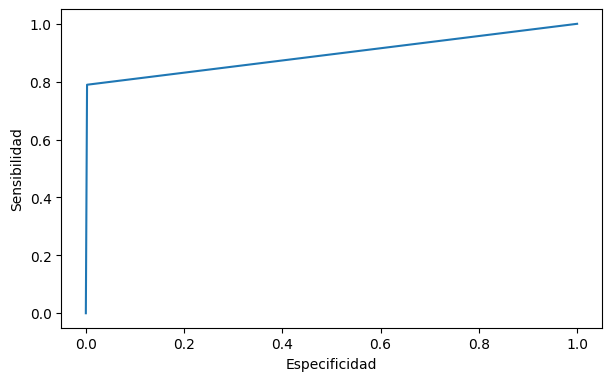

In [45]:
fpr, tpr, umbrals = roc_curve(y_test, y_pred)

fig, ax = plt.subplots(1, figsize=(6,3.7), layout='constrained')
ax.plot(fpr, tpr)
ax.set_xlabel('Especificidad')
ax.set_ylabel('Sensibilidad')
plt.show()

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3257
           1       0.97      0.79      0.87       323

    accuracy                           0.98      3580
   macro avg       0.97      0.89      0.93      3580
weighted avg       0.98      0.98      0.98      3580

